# 2D Dependence


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import os
from scipy.optimize import curve_fit
from scipy import stats

#setting formats
DARK=False
if(DARK==False):
    form='.k'
    plt.style.use(['default']) 
    fontcolor='k'
else:
    form='.w'
    plt.style.use(['dark_background'])
    fontcolor='w'


SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

%matplotlib inline

params = {
    'font.family': 'serif',
    'font.size' : 24, 'axes.titlesize' : 42, 'axes.labelsize' : 32, 'axes.linewidth' : 2,
    # ticks
    'xtick.labelsize' : 24, 'ytick.labelsize' : 24, 'xtick.major.size' : 18, 'xtick.minor.size' : 8,
    'ytick.major.size' : 18, 'ytick.minor.size' : 8, 'xtick.major.width' : 2, 'xtick.minor.width' : 2,
    'ytick.major.width' : 2, 'ytick.minor.width' : 2, 'xtick.direction' : 'in', 'ytick.direction' : 'in',
    # markers
    'lines.markersize' : 8, 'lines.markeredgewidth' : 2, 'errorbar.capsize' : 5, 'lines.linewidth' : 2,
    #'lines.linestyle' : None, 'lines.marker' : None,
    'savefig.bbox' : 'tight', 'legend.fontsize' : 24,
    'axes.labelsize': 30, 'axes.titlesize':24, 'xtick.labelsize':24, 'ytick.labelsize':24,
    'backend': 'Agg', 'mathtext.fontset': 'dejavuserif',
    'figure.facecolor':'w',
    #pad
    'axes.labelpad':20,
    # ticks
    'xtick.major.pad': 7,   'xtick.minor.pad': 7,   
    'ytick.major.pad': 4, 'ytick.minor.pad': 4,
}
plt.rcParams.update(params)

This is a notebook that does the 2D dependence analysis for the RELICS paper. 

Import relavent data:

In [2]:
file_path = [
    './h5file/outnpy/lv2415_lv2414_20241205_12DB_LED_combine_1p5v_750mv_1p36v_680mv_10000us_50hz_run0_raw_b0_seg0_single_gussain_scaled.h5py',
    './h5file/outnpy/lv2415_lv2414_20241205_12DB_LED_combine_1p75v_875mv_1p36v_680mv_10000us_50hz_run0_raw_b0_seg0_single_gussain_scaled.h5py',
    './h5file/outnpy/lv2415_lv2414_20241205_12DB_LED_combine_2v_1v_1p36v_680mv_10000us_50hz_run0_raw_b0_seg0_single_gussain_scaled_corrected_1us.h5py',
    './h5file/outnpy/lv2415_lv2414_20241205_12DB_LED_combine_2p25v_1p125v_1p36v_680mv_10000us_50hz_run0_raw_b0_seg0_single_gussain_scaled_corrected_1us.h5py',
    './h5file/outnpy/lv2415_lv2414_20241205_12DB_LED_combine_2p5v_1p25v_1p36v_680mv_10000us_50hz_run0_raw_b0_seg0_single_gussain_scaled_corrected_1us.h5py',
    './h5file/outnpy/lv2415_lv2414_20241205_12DB_LED_combine_2p75v_1p375v_1p36v_680mv_10000us_50hz_run0_raw_b0_seg0_single_gussain_scaled_corrected_1us.h5py',
    './h5file/outnpy/lv2415_lv2414_20241205_12DB_LED_combine_3v_1p5v_1p36v_680mv_10000us_50hz_run0_raw_b0_seg0_single_gussain_scaled_corrected_1us.h5py',
    './h5file/outnpy/lv2415_lv2414_20241205_12DB_LED_combine_3p25v_1p625v_1p36v_680mv_10000us_50hz_run0_raw_b0_seg0_single_gussain_scaled_corrected_1us.h5py',
    './h5file/outnpy/lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1p75v_1p36v_680mv_10000us_50hz_run0_raw_b0_seg0_single_gussain_scaled_corrected_1us.h5py'
]

This code box plots the raw data, surviving factor means 
$$
\Gamma = \frac{\text{measured S2 area}}{\text{expected S2 area}},
$$
and $\Delta t$ is the time interval between S1 and S2.

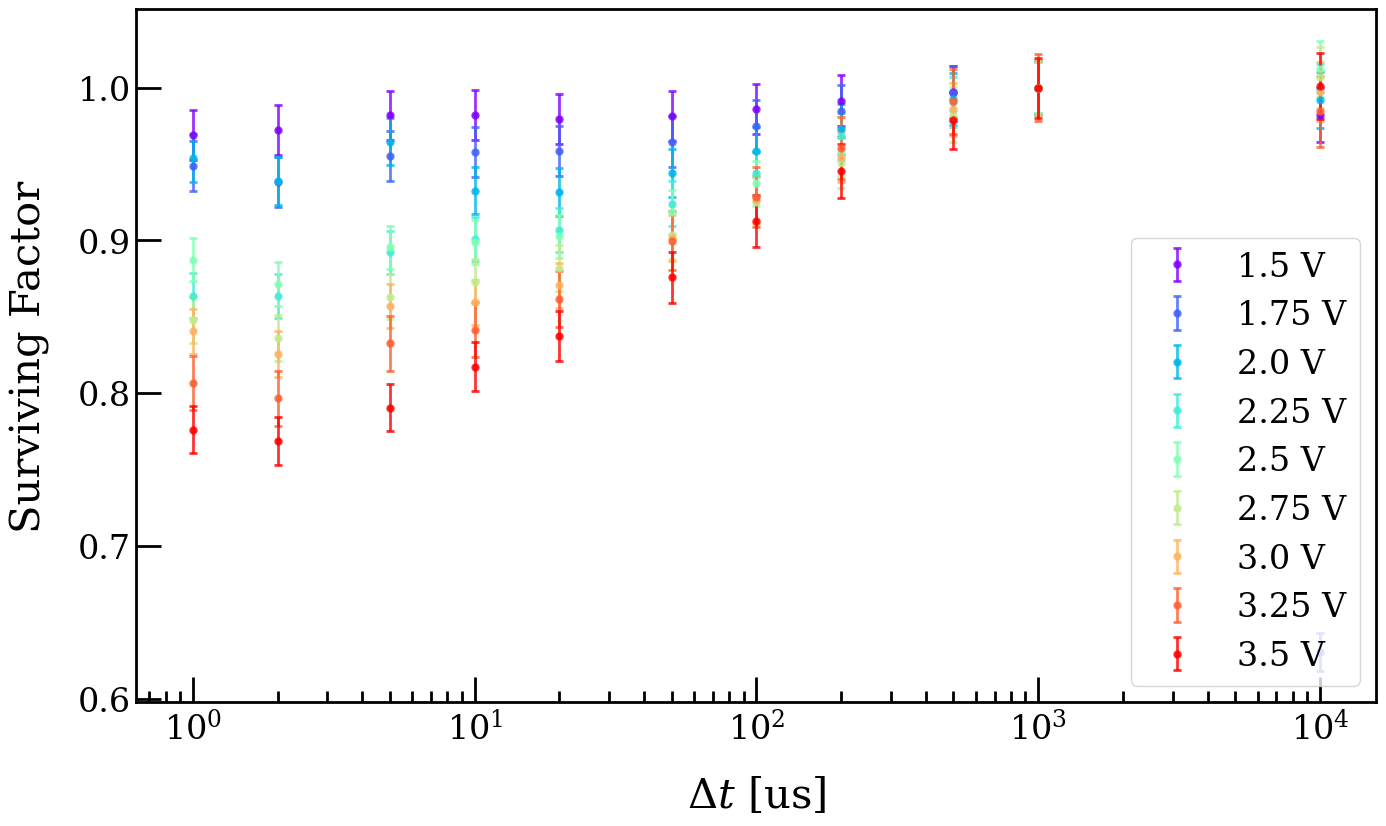

In [3]:
cmap = plt.cm.rainbow(np.linspace(0, 1, 9))
voltages = [1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5]

def plot_ratio(file, index, PEns):
    """plot waveform 
    parameter:
        df : scaled data with pandas DataFrame
        cmap_index: 0,1,2,3...
        voltage(str): '1p8v' LED driver voltage
    """ 
    df = pd.read_hdf(file, key='winfo')
    ax.errorbar(df.Delta_t, df.R2ref, color = cmap[index], yerr=df.R2ref_err, fmt='.', alpha=0.8, markersize=8, capsize=3, elinewidth=2, capthick=2, label=r'{} V'.format(PEns)) 
    #ax.errorbar(df.Delta_t, (df.Ch0_s2_mu/df.Ch2_s2_mu)/(df.Ch0_s2_mu[10]/df.Ch2_s2_mu[10]), color = cmap[index], yerr=df.R2ref_err, fmt='.', alpha=0.8, markersize=8, capsize=3, elinewidth=2, capthick=2, label=r'{} V'.format(PEns))      
    #ax.errorbar(df.Delta_t, df.Ch0_s2_mu/df.Ch2_s2_mu, color = cmap[index], yerr=df.R2ref_err, fmt='.', alpha=0.8, markersize=8, capsize=3, elinewidth=2, capthick=2, label=r'{} V'.format(PEns))
    #ax.errorbar(df.Delta_t, (df.Ch0_s2_mu)/(df.Ch0_s2_mu[10]), color = cmap[index], yerr=df.R2ref_err, fmt='.', alpha=0.8, markersize=8, capsize=3, elinewidth=2, capthick=2, label=r'{} V'.format(PEns))

a, b = 6392.332378097937, -9206.740906084735
def y(x):
    return a*x + b

fig, ax = plt.subplots(figsize=(16, 9))
voltage_map = {'3p5v_1p75v':3.5, '3p25v_1p625v':3.25, '3v_1p5v':3.0, '2p75v_1p375v':2.75,
               '2p5v_1p25v':2.5, '2p25v_1p125v':2.25, '2v_1v':2.0, '1p75v_875mv':1.75, '1p5v_750mv':1.5}


i = 0

for file in file_path:
    voltage= file.split('combine_')[1].split('_1p36v_')[0]
    v = voltage_map.get(voltage)
    # PEns = round(y(v), 1)
    plot_ratio(file, i, v)            
    i += 1

ax.set_xscale('log')
ax.set_xlabel(r'$\Delta t$ [us]')
ax.set_ylabel(r'Surviving Factor')   
#ax.axhline(y=1.0, color='grey', linestyle='--', label='')
#ax.set_title('')
plt.legend(loc='lower right')
plt.show()

Here is a box for data inspection. From this we can get a brief idea of data structure. 

+ Channel 0 is the anode readout of test PMT, attenuation has been counted. Related to PEns_anode. 
+ Channel 1 is the dynode 7 readout of test PMT, without attenuation. Related to PEns_dynode.
+ Channel 2 is the anode readout of reference PMT, crossed polar is not counted. Related to PEns_filter.

Other paramters:

+ R2ref is the surviving factor defined previously. 

In [4]:
df_test = pd.read_hdf(file_path[-1], key='winfo')   
df_test

,Ch0_s2_mu,Ch1_s2_mu,Ch2_s2_mu,S2_width,S1_width,Delta_t,ftag,Ch0_s2_sigma,Ch1_s2_sigma,Ch2_s2_sigma,R2ref,R2ref_err,R2ref_filter,R2ref_filter_err,PEns_anode,PEns_anode_err,PEns_filter,PEns_fliter_err,PEns_dynode,PEns_dynode_err
0,19661.280906,132.888809,133.084431,1000,150,1,lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1...,275.224189,55.145343,3.238929,0.776030,0.015380,0.438280,NaN,19.661281,0.278019,11.104140,4.621030,16.137932,0.535991
1,19475.033269,122.952860,165.518290,1000,150,2,lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1...,290.821323,16.138406,3.791759,0.768679,0.015750,0.405510,NaN,19.475033,0.293418,10.273896,1.386377,20.070889,0.645896
2,20030.500732,346.225904,149.716690,1000,150,5,lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1...,281.221715,19.213099,3.701846,0.790603,0.015692,1.141886,NaN,20.030501,0.284061,28.930509,1.843483,18.154774,0.608161
3,20706.024525,338.028380,174.951728,1000,150,10,lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1...,279.526710,19.584531,3.745742,0.817266,0.015912,1.114850,NaN,20.706025,0.282578,28.245527,1.860277,21.214796,0.660458
4,21219.985739,297.011766,177.880812,1000,150,20,lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1...,282.929875,19.811083,3.855339,0.837552,0.016211,0.979573,NaN,21.219986,0.286095,24.818194,1.828812,21.569979,0.675438
5,22190.719618,296.676722,189.539260,1000,150,50,lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1...,279.650619,19.461690,3.998503,0.875867,0.016518,0.978468,NaN,22.190720,0.283150,24.790198,1.802050,22.983693,0.710579
6,23121.546129,298.194167,199.238696,1000,150,100,lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1...,290.004476,19.490012,4.093816,0.912607,0.017175,0.983473,NaN,23.121546,0.293668,24.916995,1.805898,24.159855,0.737962
7,23956.614984,297.556252,207.003142,1000,150,200,lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1...,294.104148,19.179446,4.169411,0.945567,0.017628,0.981369,NaN,23.956615,0.297981,24.863691,1.781801,25.101378,0.759911
8,24795.909917,295.039286,212.170138,1000,150,500,lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1...,324.993093,18.915258,4.359213,0.978694,0.018791,0.973068,NaN,24.795910,0.328755,24.653374,1.759070,25.727932,0.785834
9,25335.718027,293.517392,214.347826,1000,150,1000,lv2415_lv2414_20241205_12DB_LED_combine_3p5v_1...,348.167241,19.183957,4.319971,1.000000,0.019639,0.968049,0.000071,25.335718,0.351835,24.526205,1.777547,25.992001,0.787085


### The following boxes tests the 1D exponential model.

In [5]:
def test_function(dt, a, b):
    sf = a * dt + b
    return sf

def fit_function(file_index):
    df_test = pd.read_hdf(file_path[file_index], key='winfo')   

    # exclude the first and last data points. 
    xdata = df_test["Delta_t"][1:-2]
    log_xdata = np.log10(xdata)
    ydata = df_test["R2ref"][1:-2]

    popt, pcov = curve_fit(test_function, log_xdata, ydata, p0=[1, 1])
    perr = np.sqrt(np.diag(pcov))

    return popt, perr

def write_result(file_index):
    popt, perr = fit_function(file_index)
    with open('./fitted_parameters.txt', 'a') as f:
        f.write(f"{file_index} {popt[0]:.4f} {perr[0]:.4f} {popt[1]:.4f} {perr[1]:.4f}\n")

def save_result():
    a_list = []
    da_list = []
    b_list = []
    db_list = []
    index_list = []
    for i in range(len(file_path)):
        popt, perr = fit_function(i)
        a_list.append(popt[0])
        da_list.append(perr[0])
        b_list.append(popt[1])
        db_list.append(perr[1])
        index_list.append(i)
    df_parameters = pd.DataFrame({'file_index': index_list, 'a': a_list, 'a_err': da_list, 'b': b_list, 'b_err': db_list})
    return df_parameters

def plot_result(file_index):
    df_test = pd.read_hdf(file_path[file_index], key='winfo')   
    popt, perr = fit_function(file_index)
    logt = np.linspace(0, 3, 100)

    plt.plot(logt, test_function(logt, popt[0], popt[1]), color=cmap[i])
    plt.errorbar(np.log10(df_test.Delta_t), df_test.R2ref, yerr=df_test.R2ref_err, fmt='.', color=cmap[i], label=f'{voltages[file_index]} V')
    


In [6]:
# Write results to a txt file
for i in range(len(file_path)):
    write_result(i)

In [7]:
# save the parameters as a dataframe
df_parameters = save_result()
df_parameters

,file_index,a,a_err,b,b_err
0,0,0.008403,0.001597,0.971347,0.002693
1,1,0.021685,0.002068,0.933743,0.003487
2,2,0.018297,0.007715,0.927052,0.013006
3,3,0.050247,0.003289,0.848397,0.005545
4,4,0.043819,0.004064,0.855130,0.006851
5,5,0.058090,0.003619,0.814760,0.006102
6,6,0.065453,0.004662,0.799552,0.007860
7,7,0.081600,0.003560,0.766650,0.006002
8,8,0.091023,0.003699,0.729319,0.006236


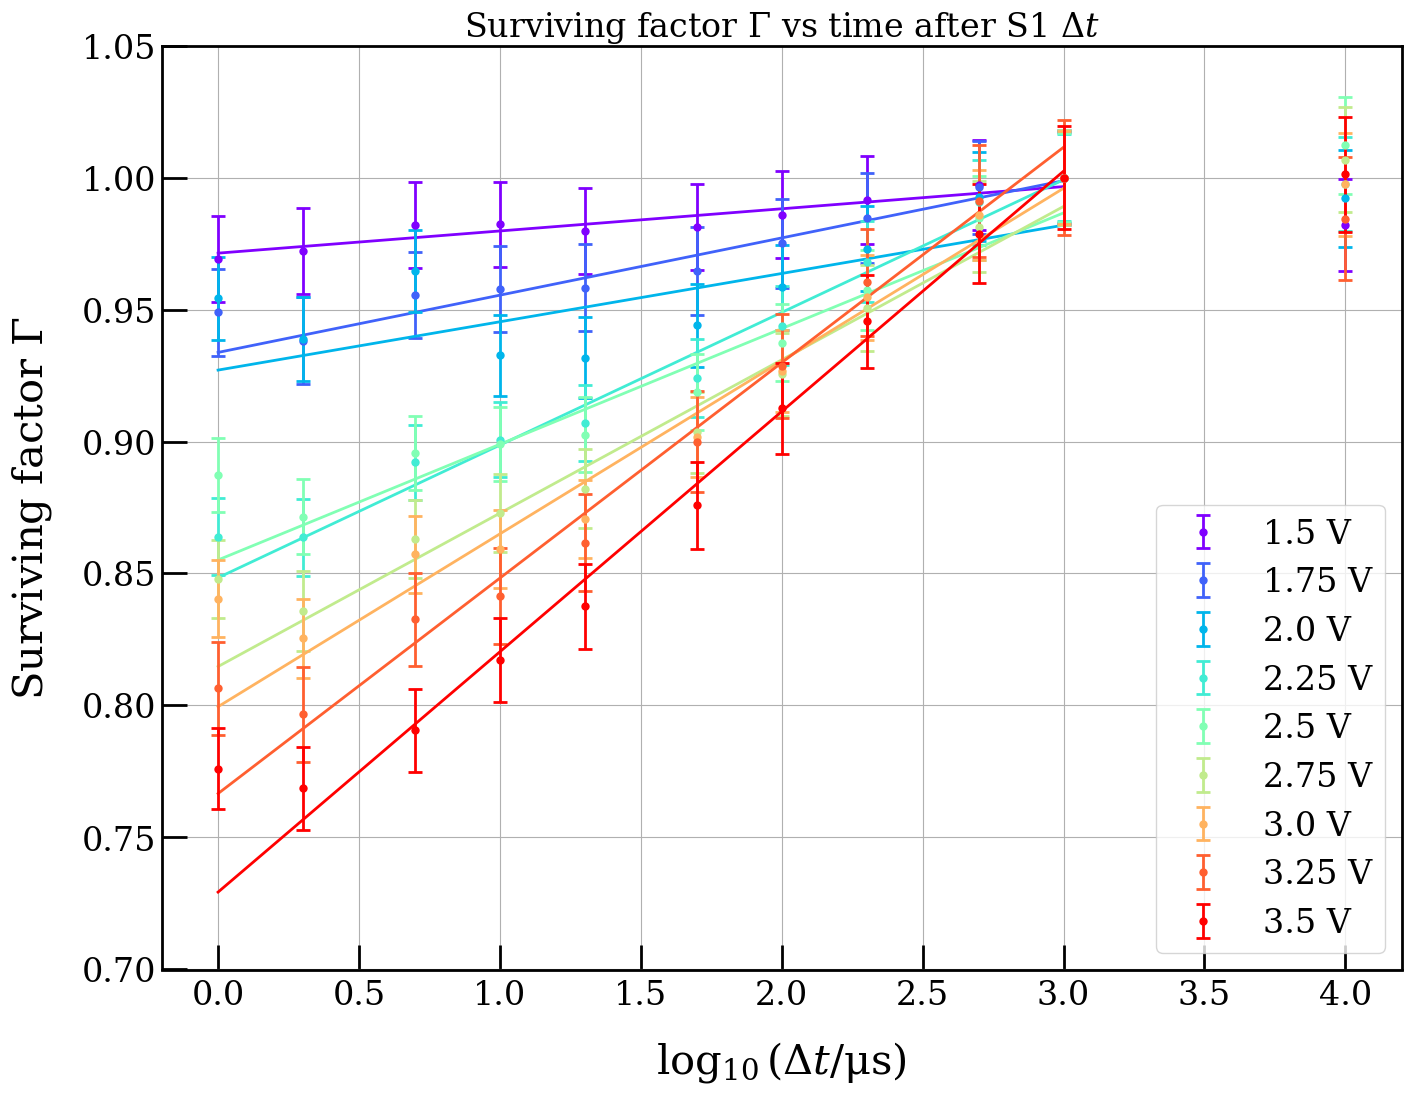

In [8]:
plt.figure(figsize=(16, 12))
plt.title(r'Surviving factor $\Gamma$ vs time after S1 $\Delta t$')
plt.xlabel(r"$\log_{10}(\Delta t/{\rm \mu s})$")
plt.ylabel(r'Surviving factor $\Gamma$')
plt.ylim(0.7, 1.05)
for i in range(len(file_path)):
    plot_result(i)
plt.grid(True)
plt.legend()
plt.show()

We've excluded the first data point at $\Delta t=1\ {\rm \mu s}$, because there's something that we still couldn't explain (probably unphysical). The other data points gives a clear exponential relationship:
$$
\Gamma = a \log_{10}(\Delta t/{\rm \mu s}) + \Gamma_0,
$$
where the parameter $a$ is fitted afterwards.  

Slope: 0.0408252200
x-Intercept: 1.3062469674
Chi-square: 20.155192639600394
Degrees of freedom: 7
P-value: 0.0052440463936813675


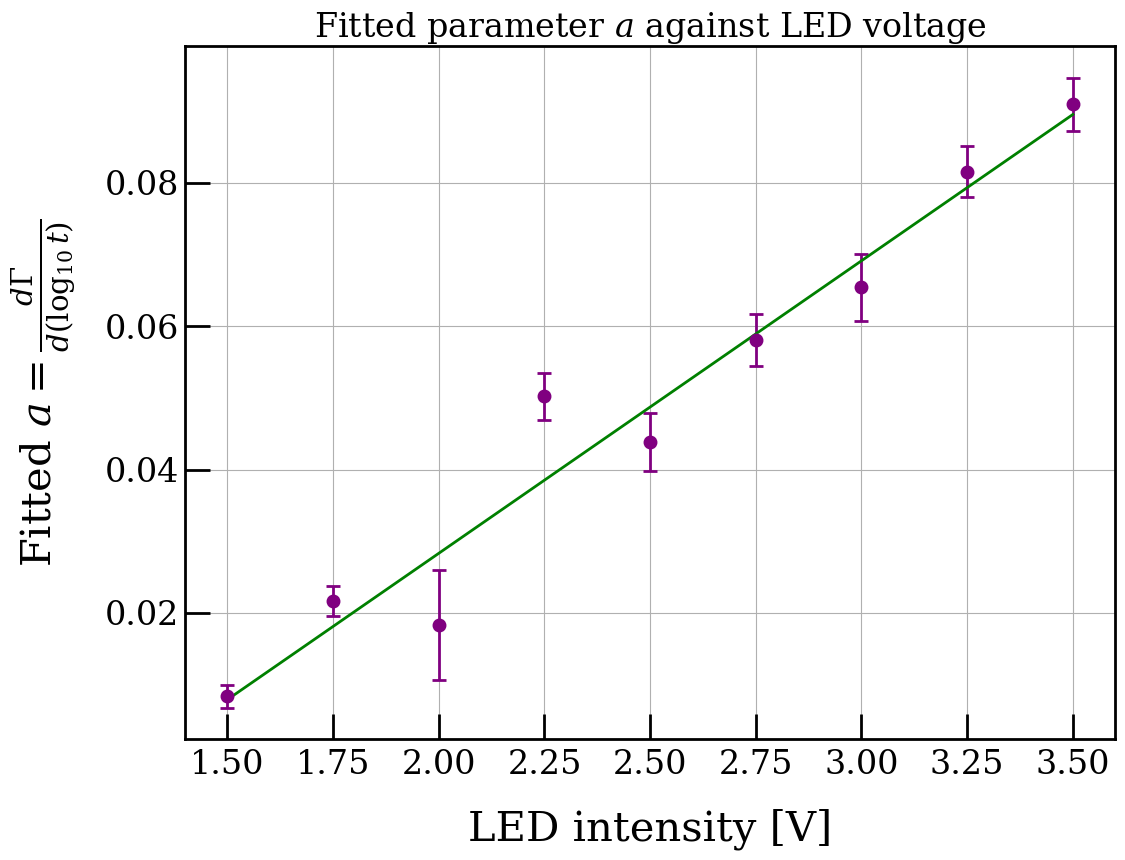

In [9]:
# convert voltage to LED intensity
### Now unknown, suppose it's linear

# Sample data (replace these with your actual data)
x = voltages # Example x data
y = df_parameters['a']  # Example y data
y_error = df_parameters['a_err']  # Example y-error data

# Step 1: Fit a linear model (y = mx + b)
# Using numpy's polyfit to fit a line of degree 1 (linear)
popt, pcov = np.polyfit(x, y, 1, cov=True)
m = popt[0]
b = popt[1]  # Slope and intercept of the best fit line
print(f"Slope: {m:.10f}")
print(f"x-Intercept: {-b/m:.10f}")

# Step 2: Calculate predicted y values using the linear model
y_pred = np.zeros(len(x))
for i in range(len(x)):
    y_pred[i] = m*x[i] + b

# Step 3: Calculate the residuals and chi-square statistic
residuals = y - y_pred
chi_square = np.sum((residuals**2) / (y_error**2))

# Step 4: Degrees of freedom
# Degrees of freedom for chi-square test is the number of data points minus the number of parameters (2: slope and intercept)
degrees_of_freedom = len(x) - 2

# Step 5: Calculate p-value using the chi-square distribution
p_value = 1 - stats.chi2.cdf(chi_square, degrees_of_freedom)

# Print results
print(f"Chi-square: {chi_square}")
print(f"Degrees of freedom: {degrees_of_freedom}")
print(f"P-value: {p_value}")

# fitted constant vs intensity
plt.figure(figsize=(12, 9))
plt.title(r'Fitted parameter $a$ against LED voltage')
plt.xlabel(r"LED intensity [V]")
plt.ylabel(r'Fitted $a=\frac{d\Gamma}{d(\log_{10}t)}$')
plt.errorbar(voltages, df_parameters['a'], yerr=df_parameters['a_err'], fmt='o', color = 'purple')
plt.plot(x, y_pred, label=f'Linear Fit: y = {m:.2f}x + {b:.2f}', color='green')
plt.grid(True)
plt.show()

Although the plot looks very linear, $P$-value is still small (due to data at $2.00$ and $2.50\ {\rm V}$), so we should find another model for our data. 

Anyway, we'll write to the end. This model gives
$$
a=m(V-V_0),\qquad V>V_0, \qquad m=0.0408\ {\rm V^{-1}}
$$
where $V$ is (roughly) proportional to the intensity of LED in the voltage range [see Jijun's work], and no saturation effect would be seen below $V_0$ because $a=0$. Also, the linear relationship implies
$$
\Gamma(0)=3a
$$
but that's simply because we have assumed that $\Gamma(10^3\ {\rm \mu s})=1$. 

To sum up, we have the S1-duration-independent model of the dimensionless surviving factor:
$$
\Gamma(V,\Delta t)=1+\left[\log_{10}\left(\frac{\Delta t}{{\rm \mu s}}\right)-3\right]m(V-V_0),
$$
where $\Delta t$ is the interval between S1 and S2, $m$ with dimension $[V]^{-1}$ should be determined by the duration of S1. 

[7.00360619e-06]


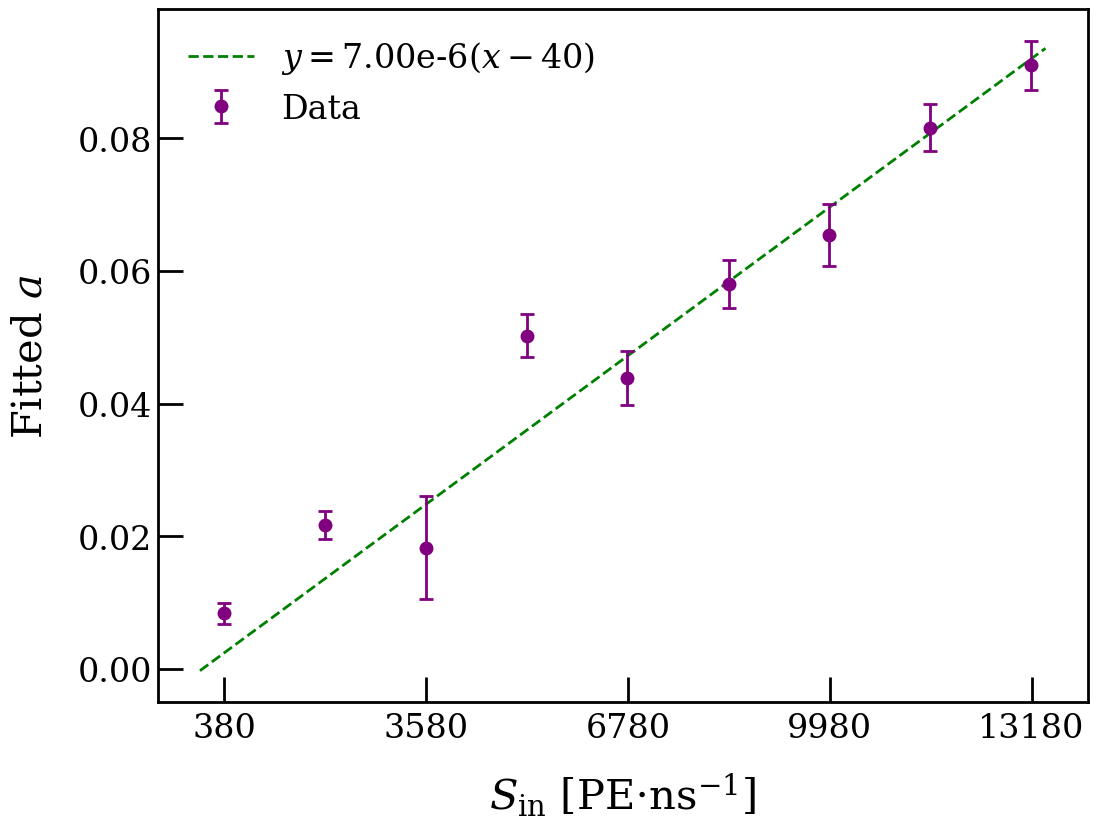

In [10]:
# Converting voltages into intensity of light:
intensities=[381, 1979.5, 3578, 5176.5, 6774, 8385.5, 9970, 11568.5, 13166]

def fitfunc(x,m):
    return m*(x-40)

popt, pcov = curve_fit(fitfunc, intensities, df_parameters['a'], p0=[7e-6])
print(popt)

x = np.linspace(0,13400,1000)
y = []
for i in range(len(x)):
    y.append(popt[0]*(x[i]-40))

x_ticks = [380, 3580, 6780, 9980, 13180]

plt.figure(figsize=(12, 9))
plt.xlabel(r"$S_{\rm in}$ [PE$\cdot$ns$^{-1}$]")
plt.ylabel(r'Fitted $a$')
plt.plot(x, y, '--', color='green', label = r'$y=7.00$e-6$(x- 40)$')
plt.errorbar(intensities, df_parameters['a'], yerr=df_parameters['a_err'], fmt='o', color = 'purple', label = "Data")
plt.xticks(x_ticks)
plt.legend(frameon=False)
plt.savefig('./Diagrams/timeconstant_2d.pdf')
plt.show()